## Hall of Fame Prediction Based on First 5 Years of Career (Qualified, Avg)
* Reduced to 1,595 unique players
* 72 HOFs

In [1]:
import pandas as pd
from functools import reduce
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import geopandas as gpd
from adjustText import adjust_text
from matplotlib.patches import Patch
warnings.filterwarnings('ignore')

data = pd.read_csv('Q5yravg_HOF.csv')

C:\Users\student\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,id,games,atbats,battingaverage,onbasepercent,slugging,onbaseslugging,hits,doubles,triples,...,ha,br,pg,alcsmvp,nlcsmvp,wsmvp,totalawards,debutyear,finalyear,inducted
0,aaronha01,152.800000,611.200000,0.329,0.379,0.577,0.956,201.200000,35.600000,8.000000,...,0,0,0,0,0,0,4,1954,1976,HOF
1,abernbr01,117.000000,463.000000,0.242,0.288,0.311,0.599,112.000000,18.000000,4.000000,...,0,0,0,0,0,0,0,2001,2005,Non-HOF
2,abramcj01,151.000000,563.000000,0.245,0.300,0.412,0.712,138.000000,28.000000,6.000000,...,0,0,0,0,0,0,0,2022,2022,Non-HOF
3,abreubo01,154.750000,551.750000,0.313,0.416,0.537,0.953,172.500000,38.500000,7.750000,...,0,0,0,0,0,0,0,1996,2014,Non-HOF
4,abreujo02,150.166667,591.166667,0.293,0.349,0.513,0.862,173.000000,36.333333,2.333333,...,0,0,0,0,0,0,3,2014,2022,Non-HOF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,zauchno01,130.000000,477.000000,0.239,0.335,0.430,0.765,114.000000,10.000000,0.000000,...,0,0,0,0,0,0,0,1951,1959,Non-HOF
1591,zeileto01,145.500000,517.500000,0.266,0.348,0.404,0.752,137.500000,28.750000,2.750000,...,0,0,0,0,0,0,0,1989,2004,Non-HOF
1592,zimmery01,154.500000,600.500000,0.287,0.357,0.490,0.847,172.250000,39.750000,2.750000,...,0,0,0,0,0,0,3,2005,2021,Non-HOF
1593,ziskri01,150.333333,540.333333,0.297,0.367,0.471,0.838,160.666667,30.666667,2.666667,...,0,0,0,0,0,0,0,1971,1983,Non-HOF


In [3]:
d1 = data.sort_values(by='inducted', ascending=True)
df = data

In [4]:
df_hof = df[df['inducted'] == 'HOF']
df_nonhof = df[df['inducted'] == 'Non-HOF']
df_recent = df[df['finalyear'] >= 2019]
pd.set_option('display.max_columns', None)

In [6]:
df.describe()

,games,atbats,battingaverage,onbasepercent,slugging,onbaseslugging,hits,doubles,triples,homeruns,extrabasehits,totalbases,runsbattedin,runs,stolenbases,caughtstealing,strikeouts,walks,intentionalwalks,hitbypitch,sacrificehits,sacrificeflys,groundedintodoubleplay,height,weight,as,poty,mvp,gg,ss,roty,mlpoty,ha,br,pg,alcsmvp,nlcsmvp,wsmvp,totalawards,debutyear,finalyear
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,143.840596,524.770031,0.271673,0.337456,0.426769,0.764224,143.005569,26.141567,3.896426,15.822017,45.860010,224.406040,66.909331,73.392027,12.197011,5.253427,90.758757,49.798056,4.083145,4.582351,3.592748,4.232811,11.193271,72.633229,193.946708,0.610031,0.019436,0.030094,0.241379,0.183072,0.052038,0.013166,0.010658,0.004389,0.007524,0.006270,0.005016,0.005643,0.578683,1989.514107,1999.905956
std,12.921374,59.917163,0.022747,0.029569,0.062648,0.082880,22.723266,6.964006,2.583866,9.395275,13.371971,44.170650,20.453091,16.097298,13.167698,4.103704,32.161815,18.092896,3.561408,3.580630,3.998381,1.907149,4.312051,2.123307,22.685821,0.996052,0.159196,0.185001,0.688710,0.572555,0.222173,0.114022,0.102720,0.066123,0.099905,0.078957,0.070666,0.074929,1.317500,19.923795,18.441366
min,50.000000,177.000000,0.176000,0.245000,0.243000,0.502000,32.000000,3.000000,0.000000,0.000000,10.000000,63.000000,14.000000,14.000000,0.000000,0.000000,19.500000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1958.000000
25%,139.333333,490.000000,0.256000,0.317000,0.384000,0.710000,129.500000,21.000000,2.000000,9.000000,36.500000,196.000000,52.000000,63.000000,3.000000,2.000000,67.000000,36.833333,1.500000,2.000000,0.500000,3.000000,8.000000,71.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1973.000000,1985.000000
50%,146.000000,529.000000,0.272000,0.337000,0.426000,0.765000,143.000000,26.000000,3.500000,15.000000,46.000000,223.000000,66.000000,73.000000,7.250000,4.250000,87.750000,47.500000,3.000000,3.666667,2.333333,4.000000,11.000000,73.000000,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000,2003.000000
75%,151.100000,563.833333,0.287000,0.356000,0.469000,0.818000,157.500000,31.000000,5.333333,22.225000,55.366667,252.166667,81.000000,83.583333,17.000000,7.083333,113.000000,61.000000,5.666667,6.000000,5.250000,5.333333,14.000000,74.000000,210.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2007.000000,2017.000000
max,162.000000,682.666667,0.354000,0.453000,0.659000,1.107000,225.666667,47.500000,16.250000,51.000000,87.000000,365.500000,143.000000,126.500000,101.000000,26.250000,198.600000,123.400000,29.000000,30.000000,34.500000,13.000000,27.000000,80.000000,295.000000,6.000000,3.000000,2.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,11.000000,2023.000000,2023.000000


In [7]:
df_hof.describe()

,games,atbats,battingaverage,onbasepercent,slugging,onbaseslugging,hits,doubles,triples,homeruns,extrabasehits,totalbases,runsbattedin,runs,stolenbases,caughtstealing,strikeouts,walks,intentionalwalks,hitbypitch,sacrificehits,sacrificeflys,groundedintodoubleplay,height,weight,as,poty,mvp,gg,ss,roty,mlpoty,ha,br,pg,alcsmvp,nlcsmvp,wsmvp,totalawards,debutyear,finalyear
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.0,72.000000,72.000000,72.000000,72.000000
mean,149.428241,562.956250,0.293708,0.363750,0.482306,0.846056,165.582176,28.638426,5.207870,22.305556,56.151852,271.553009,83.279861,89.681481,15.459491,5.959028,81.175000,61.098611,7.343981,3.942824,2.874306,4.714120,12.253935,72.791667,190.041667,2.402778,0.166667,0.208333,0.958333,0.611111,0.222222,0.097222,0.013889,0.027778,0.0,0.013889,0.0,0.013889,2.333333,1972.888889,1991.013889
std,6.157280,40.616229,0.023516,0.033552,0.071078,0.095616,20.098688,5.673660,2.492011,11.798441,13.089232,44.281115,22.476904,15.498999,18.184276,4.399570,25.846134,22.610433,4.461433,2.560866,3.222737,1.702706,4.506748,2.245104,19.790051,1.359989,0.411113,0.501757,1.368020,1.132808,0.418657,0.298339,0.117851,0.165489,0.0,0.117851,0.0,0.117851,2.483750,14.545272,14.634027
min,133.000000,478.500000,0.235000,0.306000,0.293000,0.599000,128.500000,19.000000,1.000000,1.000000,25.000000,159.833333,35.800000,52.500000,1.000000,0.666667,31.500000,27.666667,0.500000,0.250000,0.000000,1.000000,2.666667,67.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1951.000000,1968.000000
25%,146.512500,535.291667,0.277500,0.343500,0.432750,0.791000,152.787500,24.300000,3.300000,11.900000,48.362500,242.100000,65.375000,77.766667,4.000000,2.600000,62.575000,44.325000,4.000000,2.000000,0.729167,3.916667,9.000000,71.000000,175.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1959.750000,1976.750000
50%,149.833333,562.100000,0.293000,0.359000,0.483000,0.838000,165.633333,28.366667,4.791667,22.150000,57.250000,276.325000,86.166667,90.000000,8.500000,4.875000,79.625000,57.000000,6.225000,3.100000,1.750000,4.800000,12.125000,73.000000,190.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.000000,1973.000000,1992.500000
75%,153.525000,592.458333,0.311000,0.383250,0.518500,0.897500,178.083333,32.666667,6.750000,31.583333,64.500000,298.966667,101.337500,103.000000,19.250000,7.916667,92.300000,73.375000,10.125000,5.616667,4.250000,5.687500,15.450000,74.000000,197.250000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,4.000000,1986.000000,2004.000000
max,161.400000,642.000000,0.354000,0.450000,0.659000,1.107000,212.000000,45.600000,12.000000,44.500000,84.600000,362.750000,122.400000,126.500000,101.000000,26.250000,147.250000,123.400000,18.500000,11.000000,15.666667,9.000000,24.000000,78.000000,250.000000,5.000000,2.000000,2.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,10.000000,2004.000000,2018.000000


In [8]:
df_nonhof.describe()

,games,atbats,battingaverage,onbasepercent,slugging,onbaseslugging,hits,doubles,triples,homeruns,extrabasehits,totalbases,runsbattedin,runs,stolenbases,caughtstealing,strikeouts,walks,intentionalwalks,hitbypitch,sacrificehits,sacrificeflys,groundedintodoubleplay,height,weight,as,poty,mvp,gg,ss,roty,mlpoty,ha,br,pg,alcsmvp,nlcsmvp,wsmvp,totalawards,debutyear,finalyear
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,143.576439,522.964773,0.270632,0.336213,0.424143,0.760356,141.938258,26.023528,3.834428,15.515507,45.373462,222.177161,66.135413,72.621941,12.042777,5.220070,91.211830,49.263821,3.928989,4.612585,3.626713,4.210057,11.143128,72.625739,194.131320,0.525279,0.012475,0.021668,0.207485,0.162837,0.043992,0.009192,0.010506,0.003283,0.007879,0.005909,0.005253,0.005253,0.495732,1990.300066,2000.326330
std,13.097513,60.089103,0.022182,0.028792,0.061008,0.080224,22.286250,6.998649,2.572410,9.158093,13.191985,42.915584,20.031817,15.717161,12.870040,4.087716,32.366680,17.682293,3.439234,3.619563,4.029053,1.913781,4.297693,2.117860,22.802784,0.890812,0.132605,0.150087,0.619670,0.523819,0.205145,0.095467,0.101990,0.057222,0.102227,0.076670,0.072309,0.072309,1.173716,19.803368,18.500396
min,50.000000,177.000000,0.176000,0.245000,0.243000,0.502000,32.000000,3.000000,0.000000,0.000000,10.000000,63.000000,14.000000,14.000000,0.000000,0.000000,19.500000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1958.000000
25%,139.000000,488.500000,0.256000,0.317000,0.383000,0.708000,129.000000,21.000000,2.000000,8.633333,36.000000,194.708333,51.500000,62.500000,3.000000,2.000000,67.416667,36.500000,1.500000,2.000000,0.500000,3.000000,8.000000,71.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1973.500000,1986.000000
50%,145.666667,528.000000,0.271000,0.335000,0.424000,0.761000,142.000000,26.000000,3.400000,14.666667,45.000000,222.000000,65.333333,72.000000,7.000000,4.200000,89.000000,47.000000,3.000000,3.666667,2.333333,4.000000,11.000000,73.000000,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1992.000000,2004.000000
75%,151.000000,562.000000,0.285000,0.354000,0.467000,0.814000,156.000000,31.000000,5.250000,22.000000,54.708333,249.500000,79.600000,82.600000,16.900000,7.000000,113.000000,60.533333,5.500000,6.000000,5.333333,5.333333,14.000000,74.000000,210.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,2018.000000
max,162.000000,682.666667,0.345000,0.453000,0.629000,1.048000,225.666667,47.500000,16.250000,51.000000,87.000000,365.500000,143.000000,124.666667,91.500000,26.000000,198.600000,115.500000,29.000000,30.000000,34.500000,13.000000,27.000000,80.000000,295.000000,6.000000,3.000000,2.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,11.000000,2023.000000,2023.000000


In [9]:
p={'HOF': 'forestgreen', 'Non-HOF': 'darkkhaki'}

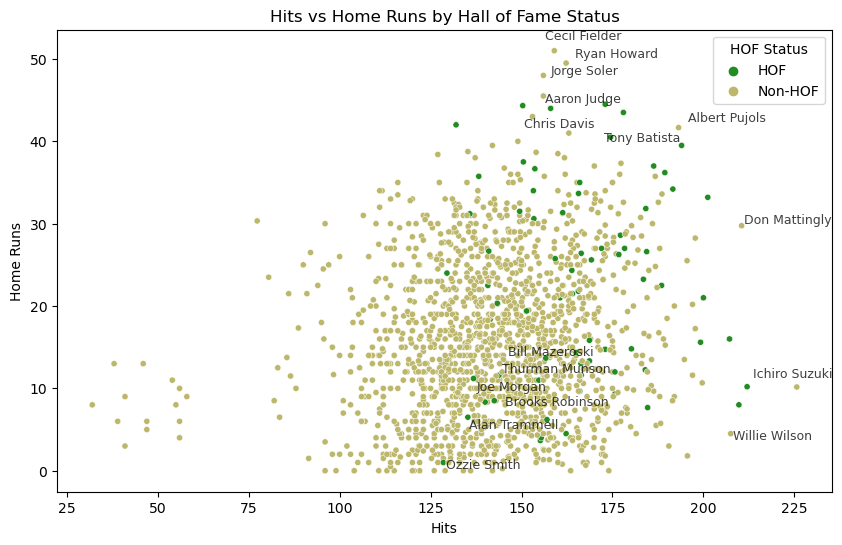

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hits', y='homeruns', hue='inducted', data=df, palette=p, s=20)
plt.title('Hits vs Home Runs by Hall of Fame Status')
plt.xlabel('Hits')
plt.ylabel('Home Runs')
plt.legend(title='HOF Status')

hof_outliers = df_hof[(df_hof['hits'] < 150) & (df_hof['homeruns'] < 15)]
nonhof_outliers = df_nonhof[(df_nonhof['hits'] > 200) | (df_nonhof['homeruns'] > 40)]

texts = []

for i in range(hof_outliers.shape[0]):
    texts.append(plt.text(hof_outliers['hits'].iloc[i], hof_outliers['homeruns'].iloc[i], hof_outliers['playername'].iloc[i], 
                          fontsize=9, alpha=0.75))

for i in range(nonhof_outliers.shape[0]):
    texts.append(plt.text(nonhof_outliers['hits'].iloc[i], nonhof_outliers['homeruns'].iloc[i], nonhof_outliers['playername'].iloc[i], 
                          fontsize=9, alpha=0.75))

adjust_text(texts)

plt.show()


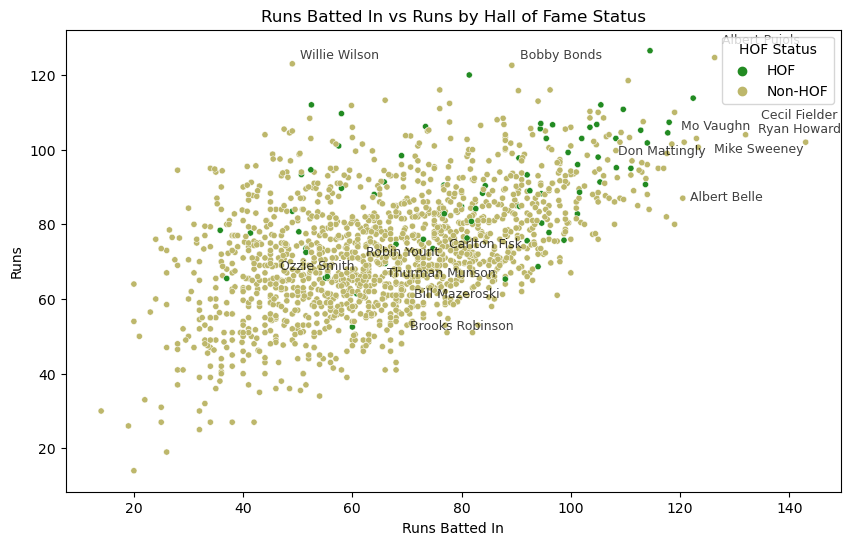

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runsbattedin', y='runs', hue='inducted', data=df, palette=p, s=20)
plt.title('Runs Batted In vs Runs by Hall of Fame Status')
plt.xlabel('Runs Batted In')
plt.ylabel('Runs')
plt.legend(title='HOF Status')

hof_outliers = df_hof[(df_hof['runsbattedin'] < 70) & (df_hof['runs'] < 70)]
nonhof_outliers = df_nonhof[(df_nonhof['runsbattedin'] > 120) | (df_nonhof['runs'] > 120)]

texts = []

for i in range(hof_outliers.shape[0]):
    x, y, name = hof_outliers['runsbattedin'].iloc[i], hof_outliers['runs'].iloc[i], hof_outliers['playername'].iloc[i]
    texts.append(plt.text(x + 10, y + 1, name, fontsize=9, alpha=0.75))

for i in range(nonhof_outliers.shape[0]):
    x, y, name = nonhof_outliers['runsbattedin'].iloc[i], nonhof_outliers['runs'].iloc[i], nonhof_outliers['playername'].iloc[i]
    texts.append(plt.text(x + 1, y + 1, name, fontsize=9, alpha=0.75))

adjust_text(texts)

plt.show()

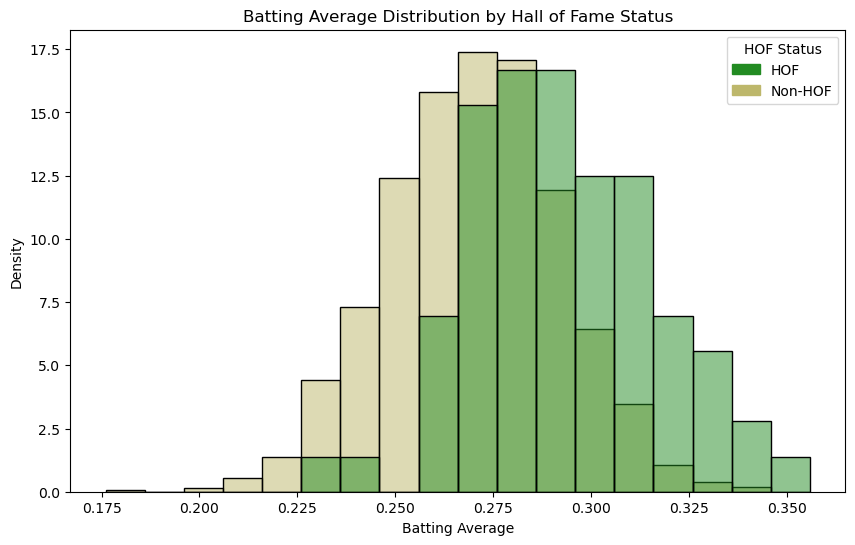

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='battingaverage', binwidth=0.01, hue='inducted', palette=p, alpha=0.5, kde=False, stat="density", common_norm=False)
plt.xlabel('Batting Average')
plt.ylabel('Density')
plt.title('Batting Average Distribution by Hall of Fame Status')

legend_labels = {'HOF': 'forestgreen', 'Non-HOF': 'darkkhaki'}
patches = [Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches, title='HOF Status')

plt.show()

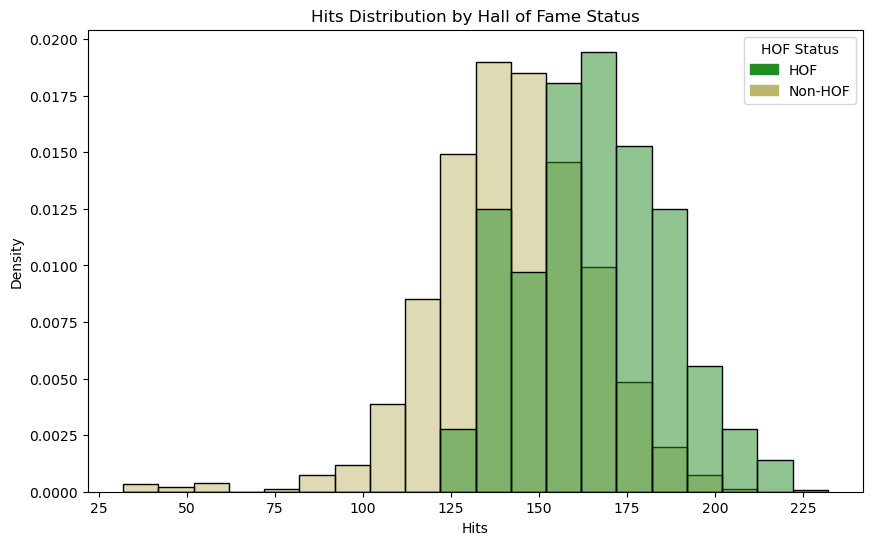

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='hits', binwidth=10, hue='inducted', palette=p, alpha=0.5, kde=False, stat="density", common_norm=False)
plt.xlabel('Hits')
plt.ylabel('Density')
plt.title('Hits Distribution by Hall of Fame Status')

legend_labels = {'HOF': 'forestgreen', 'Non-HOF': 'darkkhaki'}
patches = [Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches, title='HOF Status')

plt.show()

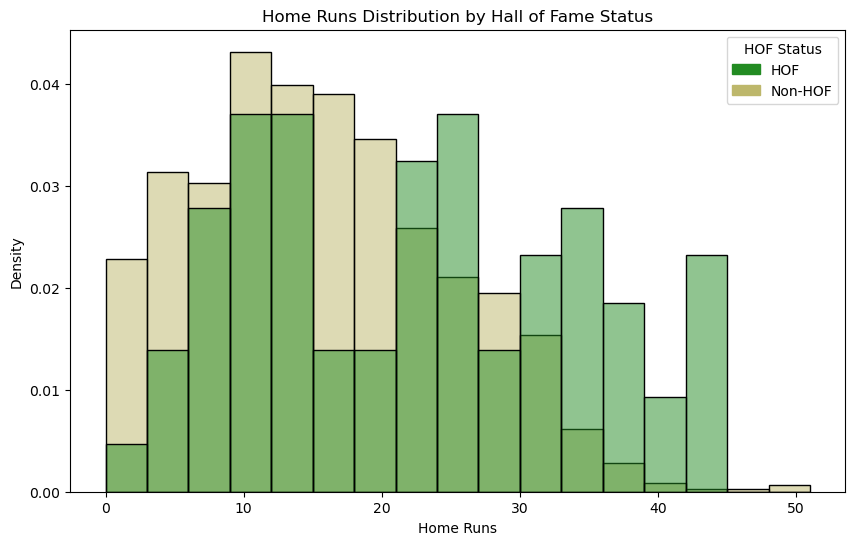

In [17]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='homeruns', binwidth=3, hue='inducted', palette=p, alpha=0.5, kde=False, stat="density", common_norm=False)
plt.xlabel('Home Runs')
plt.ylabel('Density')
plt.title('Home Runs Distribution by Hall of Fame Status')

legend_labels = {'HOF': 'forestgreen', 'Non-HOF': 'darkkhaki'}
patches = [Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches, title='HOF Status')

plt.show()

   hits_decile  total_players  hof_players  hof_percentage
0            0            160            0        0.000000
1            1            159            0        0.000000
2            2            160            3        1.875000
3            3            159            3        1.886792
4            4            160            6        3.750000
5            5            159            2        1.257862
6            6            159            7        4.402516
7            7            160            9        5.625000
8            8            159           15        9.433962
9            9            160           27       16.875000


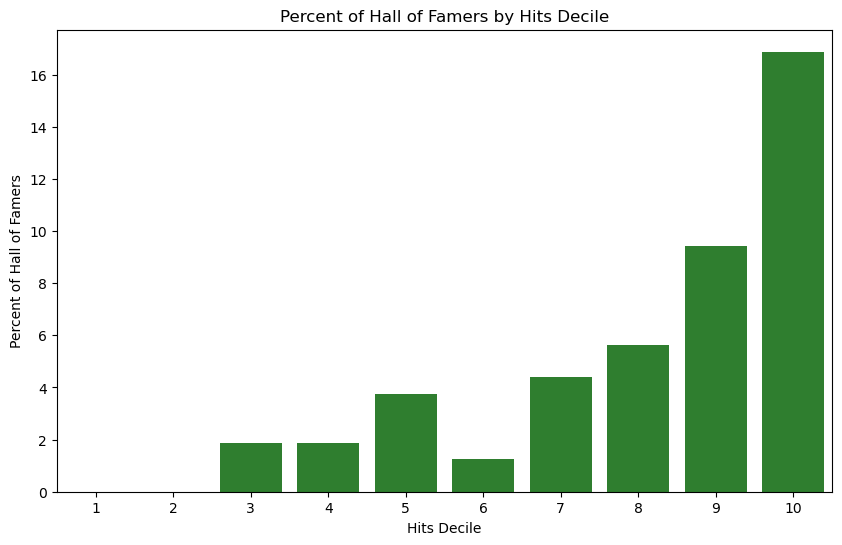

In [18]:
df['inducted'] = df['inducted'].replace({'HOF': 1, 'Non-HOF': 0})

df['hits'] = pd.to_numeric(df['hits'], errors='coerce')

np.random.seed(0)

df['hits_noisy'] = df['hits'] + np.random.normal(0, 1e-6, size=len(df))

num_deciles = 10

df['hits_decile'] = pd.qcut(df['hits_noisy'], q=num_deciles, labels=False)

decile_summary = df.groupby('hits_decile').agg(
    total_players=('playername', 'count'),
    hof_players=('inducted', 'sum')
).reset_index()

decile_summary['hof_percentage'] = (decile_summary['hof_players'] / decile_summary['total_players']) * 100

print(decile_summary)

plt.figure(figsize=(10, 6))
sns.barplot(x='hits_decile', y='hof_percentage', data=decile_summary, color='forestgreen')
plt.xlabel('Hits Decile')
plt.ylabel('Percent of Hall of Famers')
plt.title('Percent of Hall of Famers by Hits Decile')
plt.xticks(ticks=range(num_deciles), labels=range(1, num_deciles + 1))
plt.show()

df['inducted'] = df['inducted'].replace({1: "HOF", 0: "Non-HOF"})

   hr_decile  total_players  hof_players  hof_percentage
0          0            160            3        1.875000
1          1            159            3        1.886792
2          2            160            7        4.375000
3          3            159            6        3.773585
4          4            160            7        4.375000
5          5            159            3        1.886792
6          6            159            3        1.886792
7          7            160            9        5.625000
8          8            159            9        5.660377
9          9            160           22       13.750000


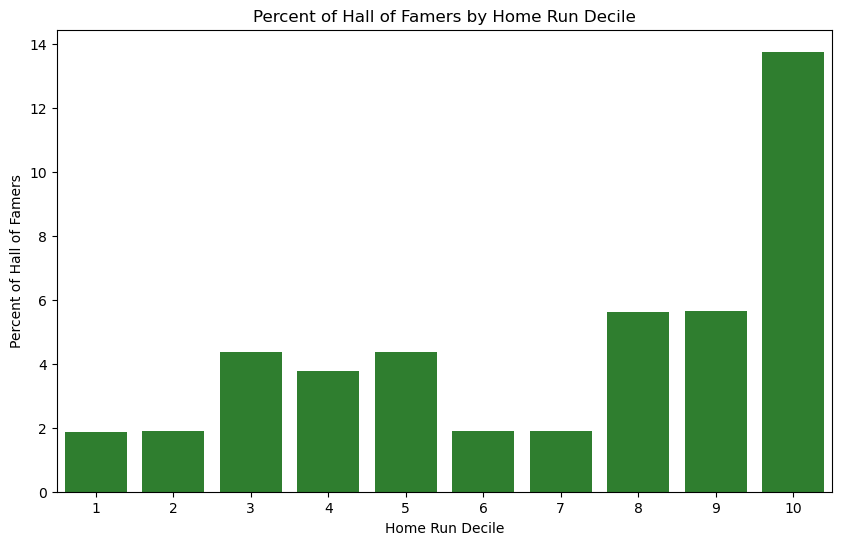

In [19]:
df['inducted'] = df['inducted'].replace({'HOF': 1, 'Non-HOF': 0})

df['homeruns'] = pd.to_numeric(df['homeruns'], errors='coerce')

np.random.seed(0)

df['homeruns_noisy'] = df['homeruns'] + np.random.normal(0, 1e-6, size=len(df))

num_deciles = 10

df['hr_decile'] = pd.qcut(df['homeruns_noisy'], q=num_deciles, labels=False)

decile_summary = df.groupby('hr_decile').agg(
    total_players=('playername', 'count'),
    hof_players=('inducted', 'sum')
).reset_index()

decile_summary['hof_percentage'] = (decile_summary['hof_players'] / decile_summary['total_players']) * 100

print(decile_summary)

plt.figure(figsize=(10, 6))
sns.barplot(x='hr_decile', y='hof_percentage', data=decile_summary, color='forestgreen')
plt.xlabel('Home Run Decile')
plt.ylabel('Percent of Hall of Famers')
plt.title('Percent of Hall of Famers by Home Run Decile')
plt.xticks(ticks=range(num_deciles), labels=range(1, num_deciles + 1))
plt.show()

df['inducted'] = df['inducted'].replace({1: "HOF", 0: "Non-HOF"})

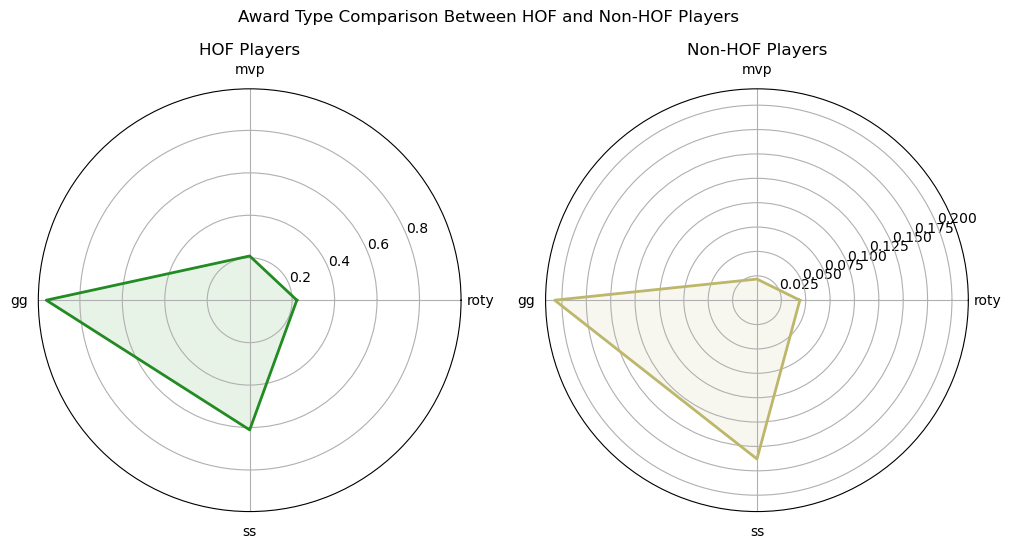

In [20]:
categories = ['roty', 'mvp', 'gg', 'ss']

hof_averages = df[df['inducted'] == 'HOF'][categories].mean().tolist()
nonhof_averages = df[df['inducted'] == 'Non-HOF'][categories].mean().tolist()

N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

hof_averages += hof_averages[:1]
nonhof_averages += nonhof_averages[:1]

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(121, polar=True)
plt.xticks(angles[:-1], categories)
ax1.plot(angles, hof_averages, linewidth=2, linestyle='solid', label='HOF', color='forestgreen')
ax1.fill(angles, hof_averages, color='forestgreen', alpha=0.1)
plt.title('HOF Players')

ax2 = plt.subplot(122, polar=True)
plt.xticks(angles[:-1], categories)
ax2.plot(angles, nonhof_averages, linewidth=2, linestyle='solid', label='Non-HOF', color='darkkhaki')
ax2.fill(angles, nonhof_averages, color='darkkhaki', alpha=0.1)
plt.title('Non-HOF Players')

plt.suptitle('Award Type Comparison Between HOF and Non-HOF Players')
plt.show()

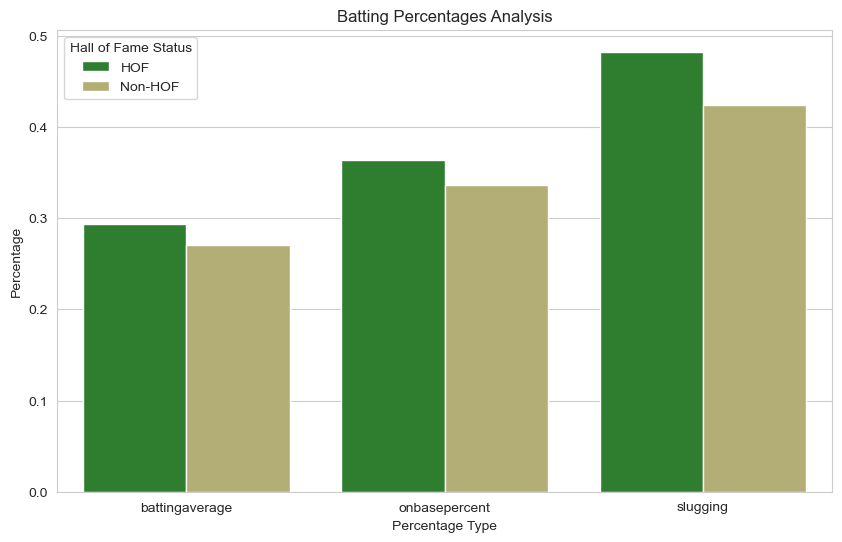

In [21]:
pivot_data = df.pivot_table(index='inducted', values=['battingaverage', 'onbasepercent', 'slugging'], aggfunc='mean')

pivot_data = pivot_data.reset_index()

melted_data = pivot_data.melt(id_vars='inducted', var_name='Percentage Type', value_name='Value')

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=melted_data, x='Percentage Type', y='Value', hue='inducted', palette=p)

plt.title('Batting Percentages Analysis')
plt.xlabel('Percentage Type')
plt.ylabel('Percentage')
plt.legend(title='Hall of Fame Status')

plt.show()

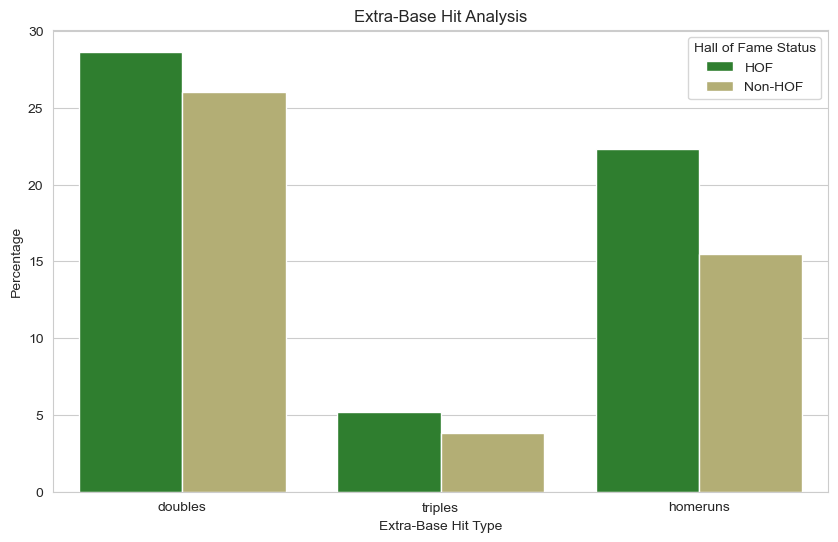

In [22]:
pivot_data = df.pivot_table(index='inducted', values=['doubles', 'triples', 'homeruns'], aggfunc='mean')

pivot_data = pivot_data.reset_index()

melted_data = pivot_data.melt(id_vars='inducted', var_name='Extra-Base Hit Type', value_name='Value')

sns.set_style("whitegrid")

order = ['doubles', 'triples', 'homeruns']



plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=melted_data, x='Extra-Base Hit Type', y='Value', hue='inducted', order=order, palette=p)

plt.title('Extra-Base Hit Analysis')
plt.xlabel('Extra-Base Hit Type')
plt.ylabel('Percentage')
plt.legend(title='Hall of Fame Status')

plt.show()

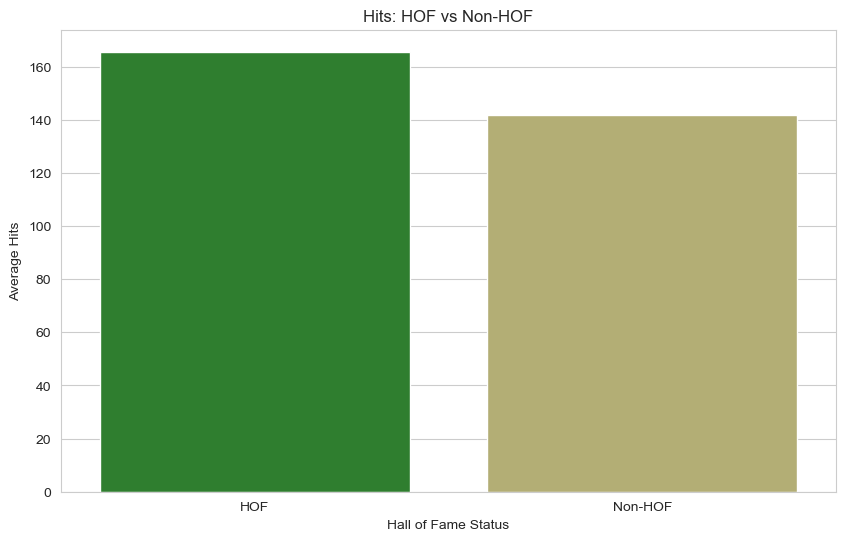

In [23]:
avg_hits = df.groupby('inducted')['hits'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='inducted', y='hits', data=avg_hits, palette=p)

plt.xlabel('Hall of Fame Status')
plt.ylabel('Average Hits')
plt.title('Hits: HOF vs Non-HOF')

plt.show()

#standard error

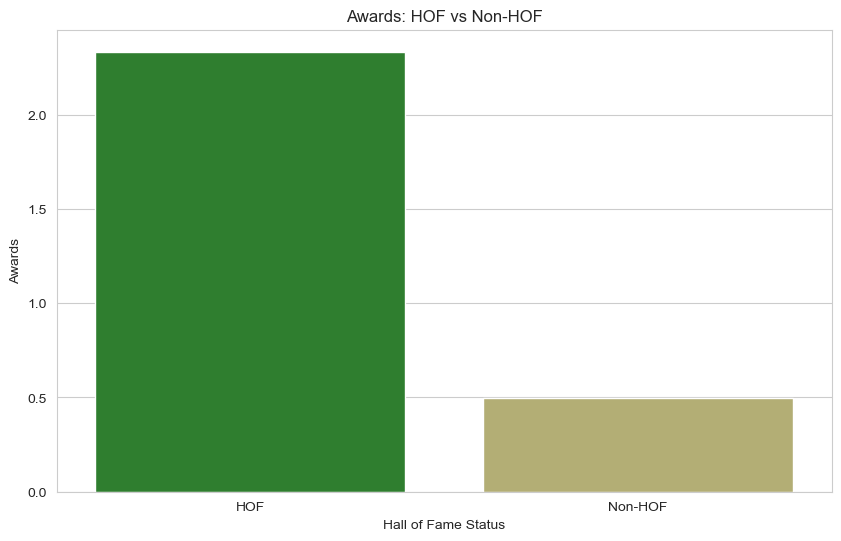

In [24]:
avg_awards = df.groupby('inducted')['totalawards'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='inducted', y='totalawards', data=avg_awards, palette=p)

plt.xlabel('Hall of Fame Status')
plt.ylabel('Awards')
plt.title('Awards: HOF vs Non-HOF')

plt.show()

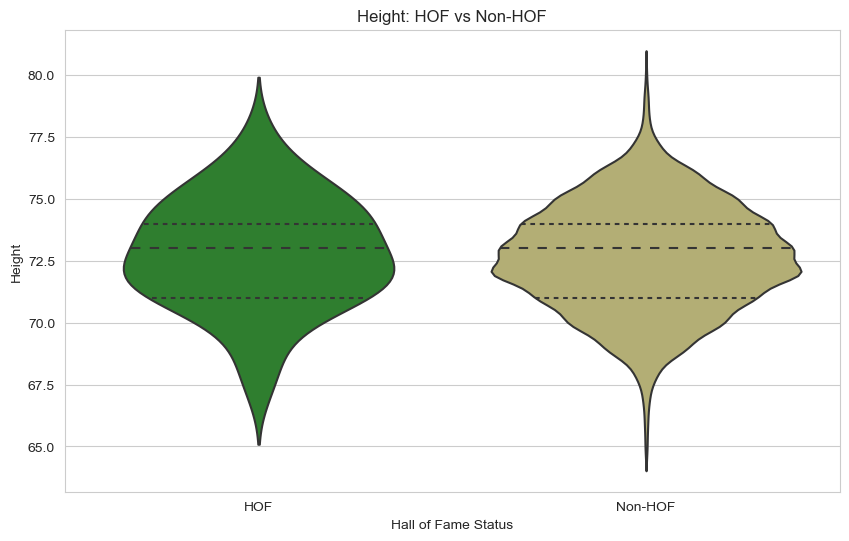

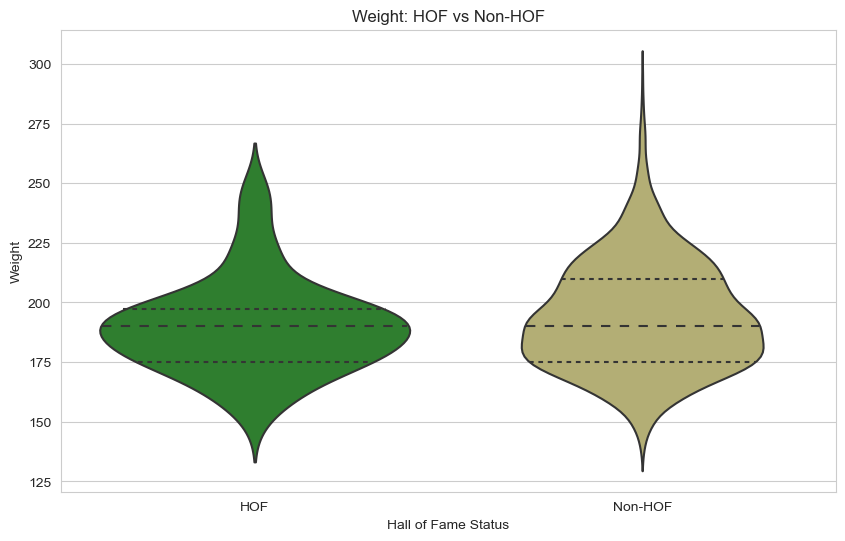

In [25]:
df['inducted'] = df['inducted'].replace({1: 'HOF', 0: 'Non-HOF'})
plt.figure(figsize=(10, 6))
sns.violinplot(x='inducted', y='height', data=df, inner='quartile', palette=p)
plt.title('Height: HOF vs Non-HOF')
plt.xlabel('Hall of Fame Status')
plt.ylabel('Height')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='inducted', y='weight', data=df, inner='quartile', palette=p)
plt.title('Weight: HOF vs Non-HOF')
plt.xlabel('Hall of Fame Status')
plt.ylabel('Weight')
plt.show()